Dataset Overview


The dataset provides information on inequality in education across countries for the years 2010–2021, along with related indicators like Human Development Groups, UNDP Developing Regions, and HDI Rank.

In [16]:
import pandas as pd

#load the dataset
df = pd.read_csv("Inequality in Education.csv")  

# View basic info
print(df.info())

#print first 6 rows
print(df.head(6))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            195 non-null    object 
 1   Country                         195 non-null    object 
 2   Human Development Groups        191 non-null    object 
 3   UNDP Developing Regions         151 non-null    object 
 4   HDI Rank (2021)                 191 non-null    float64
 5   Inequality in Education (2010)  137 non-null    float64
 6   Inequality in Education (2011)  150 non-null    float64
 7   Inequality in Education (2012)  157 non-null    float64
 8   Inequality in Education (2013)  165 non-null    float64
 9   Inequality in Education (2014)  168 non-null    float64
 10  Inequality in Education (2015)  168 non-null    float64
 11  Inequality in Education (2016)  168 non-null    float64
 12  Inequality in Education (2017)  168 

Handling Missing Data

In [17]:
#check missing values in each column
print(df.isnull().sum()) 



ISO3                               0
Country                            0
Human Development Groups           4
UNDP Developing Regions           44
HDI Rank (2021)                    4
Inequality in Education (2010)    58
Inequality in Education (2011)    45
Inequality in Education (2012)    38
Inequality in Education (2013)    30
Inequality in Education (2014)    27
Inequality in Education (2015)    27
Inequality in Education (2016)    27
Inequality in Education (2017)    27
Inequality in Education (2018)    23
Inequality in Education (2019)    21
Inequality in Education (2020)    19
Inequality in Education (2021)    19
dtype: int64


In [18]:
#drop rows with missing values 
df_cleaned = df.dropna()

#check for missing values again
print(df_cleaned.isnull().sum())


ISO3                              0
Country                           0
Human Development Groups          0
UNDP Developing Regions           0
HDI Rank (2021)                   0
Inequality in Education (2010)    0
Inequality in Education (2011)    0
Inequality in Education (2012)    0
Inequality in Education (2013)    0
Inequality in Education (2014)    0
Inequality in Education (2015)    0
Inequality in Education (2016)    0
Inequality in Education (2017)    0
Inequality in Education (2018)    0
Inequality in Education (2019)    0
Inequality in Education (2020)    0
Inequality in Education (2021)    0
dtype: int64


 Data Validation


In [19]:
#check duplicates 
# Check for duplicate rows
print(df_cleaned.duplicated().sum())


0


In [20]:
#dispay column names after cleaning the dataset
print(df_cleaned.columns)


Index(['ISO3', 'Country', 'Human Development Groups',
       'UNDP Developing Regions', 'HDI Rank (2021)',
       'Inequality in Education (2010)', 'Inequality in Education (2011)',
       'Inequality in Education (2012)', 'Inequality in Education (2013)',
       'Inequality in Education (2014)', 'Inequality in Education (2015)',
       'Inequality in Education (2016)', 'Inequality in Education (2017)',
       'Inequality in Education (2018)', 'Inequality in Education (2019)',
       'Inequality in Education (2020)', 'Inequality in Education (2021)'],
      dtype='object')


In [21]:
#data types 
print(df_cleaned.dtypes)

ISO3                               object
Country                            object
Human Development Groups           object
UNDP Developing Regions            object
HDI Rank (2021)                   float64
Inequality in Education (2010)    float64
Inequality in Education (2011)    float64
Inequality in Education (2012)    float64
Inequality in Education (2013)    float64
Inequality in Education (2014)    float64
Inequality in Education (2015)    float64
Inequality in Education (2016)    float64
Inequality in Education (2017)    float64
Inequality in Education (2018)    float64
Inequality in Education (2019)    float64
Inequality in Education (2020)    float64
Inequality in Education (2021)    float64
dtype: object


In [22]:
#general statistical summary(mean, min ,max etc) of all numerical columns 
print(df_cleaned.describe())

       HDI Rank (2021)  Inequality in Education (2010)  \
count        91.000000                       91.000000   
mean        120.406593                       25.932120   
std          46.257727                       12.830450   
min          12.000000                        3.573789   
25%          82.000000                       17.015997   
50%         125.000000                       24.470251   
75%         161.500000                       39.476275   
max         191.000000                       48.723000   

       Inequality in Education (2011)  Inequality in Education (2012)  \
count                       91.000000                       91.000000   
mean                        25.609196                       25.355953   
std                         12.920716                       13.179696   
min                          3.487021                        3.254725   
25%                         15.420023                       15.043697   
50%                         24.470251  

Visualization Setup

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot appearance
plt.style.use('ggplot')
sns.set(font_scale=1.1)


Reshaping Data for Trend Analysis


The dataset originally had separate columns for each year’s inequality value.
We convert it to a long format where each row contains a year and its corresponding education inequality score.

In [24]:
# let's melt the data to have 'Year' and 'Inequality in Education' in two columns instead of many year columns

# Step 1: Decide which columns contain 'Inequality in Education'
education_columns = []
for col in df_cleaned.columns:
    if "Inequality in Education" in col:
        education_columns.append(col)

# Step 2: Melt the dataFrame
melted_df = df.melt(
    id_vars=['Country', 'Human Development Groups', 'UNDP Developing Regions', 'HDI Rank (2021)'],
    value_vars=education_columns,
    var_name='Year',
    value_name='Education Inequality'
)

# Step 3: Extract just the year from the 'Year' column
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})')
melted_df['Year'] = melted_df['Year'].astype(int)

# print first 5 rows
print(melted_df.head())



                Country Human Development Groups UNDP Developing Regions  \
0           Afghanistan                      Low                      SA   
1                Angola                   Medium                     SSA   
2               Albania                     High                     ECA   
3               Andorra                Very High                     NaN   
4  United Arab Emirates                Very High                      AS   

   HDI Rank (2021)  Year  Education Inequality  
0            180.0  2010             42.809000  
1            148.0  2010                   NaN  
2             67.0  2010             11.900000  
3             40.0  2010             15.160302  
4             26.0  2010                   NaN  


Education Inequality vs HDI Rank

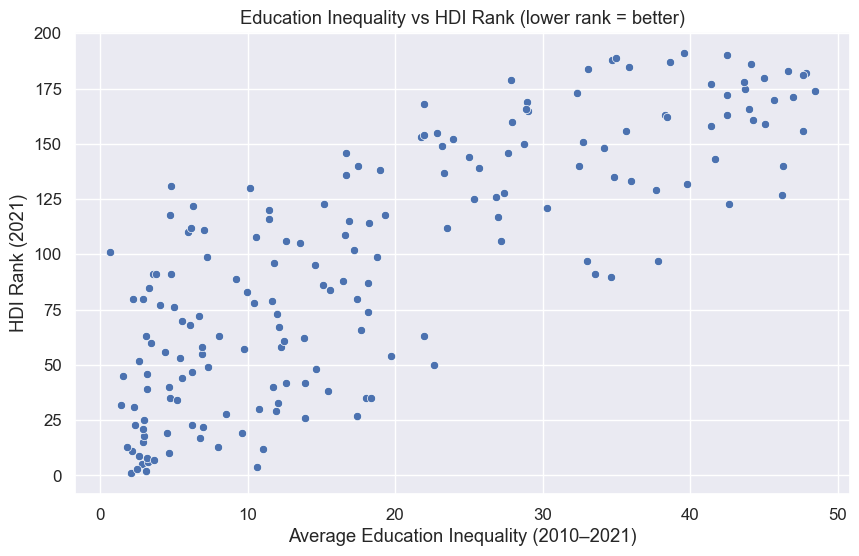

In [25]:
#correlation between Education Inequality and HDI rank

# Group by country and calculate the average inequality
avg_inequality = melted_df.groupby('Country')['Education Inequality'].mean().reset_index()

# Merge with HDI Rank
rank_data = df[['Country', 'HDI Rank (2021)']].merge(avg_inequality, on='Country')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rank_data, x='Education Inequality', y='HDI Rank (2021)')
plt.title('Education Inequality vs HDI Rank (lower rank = better)')
plt.xlabel('Average Education Inequality (2010–2021)')
plt.ylabel('HDI Rank (2021)')
plt.show()


This scatter plot shows that countries with higher education inequality tend to have poorer HDI rankings, indicating a negative correlation between educational equality and human development.

Global Education Inequality Trend (2010–2021)

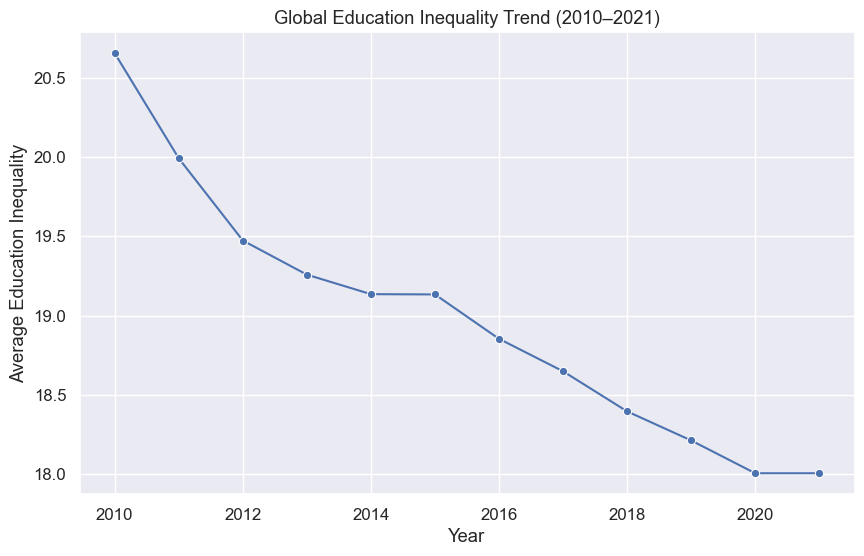

In [26]:
#trend of Education Inequality over time 

# Group by Year to see the trend
yearly_trend = melted_df.groupby('Year')['Education Inequality'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Education Inequality', marker='o')
plt.title('Global Education Inequality Trend (2010–2021)')
plt.ylabel('Average Education Inequality')
plt.show()


This line plot shows how global education inequality has evolved from 2010 to 2021, highlighting whether disparities in education are increasing or decreasing worldwide.

Inequality Across Human Development Groups

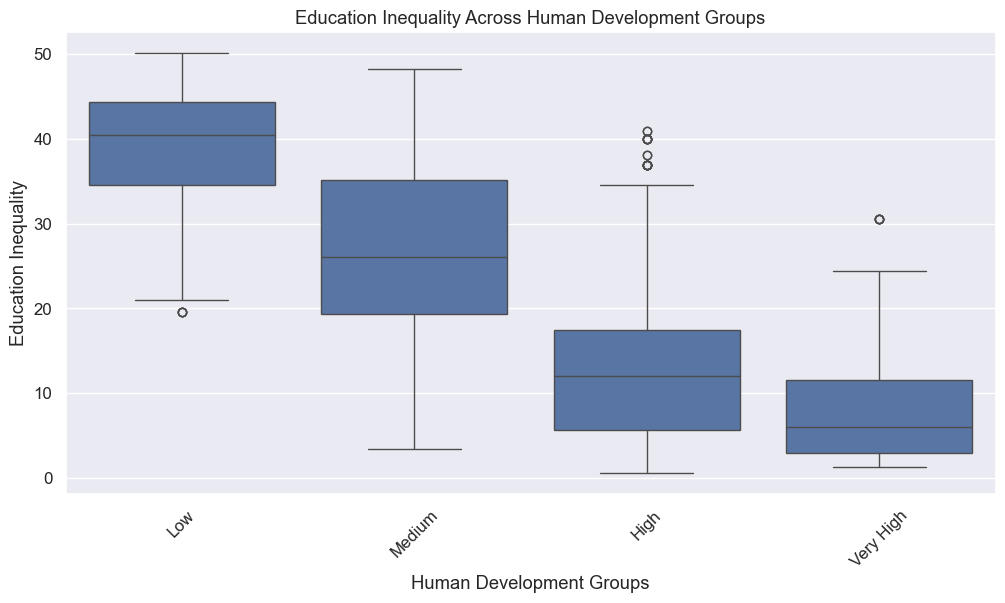

In [27]:
#Education Inequality by Human Development Groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Human Development Groups', y='Education Inequality')
plt.title('Education Inequality Across Human Development Groups')
plt.xticks(rotation=45)    #tilt labels by 45 degrees
plt.show()



Boxplots show that less developed human development groups generally have higher and more varied levels of education inequality compared to highly developed groups.

 Inequality by UNDP Developing Regions

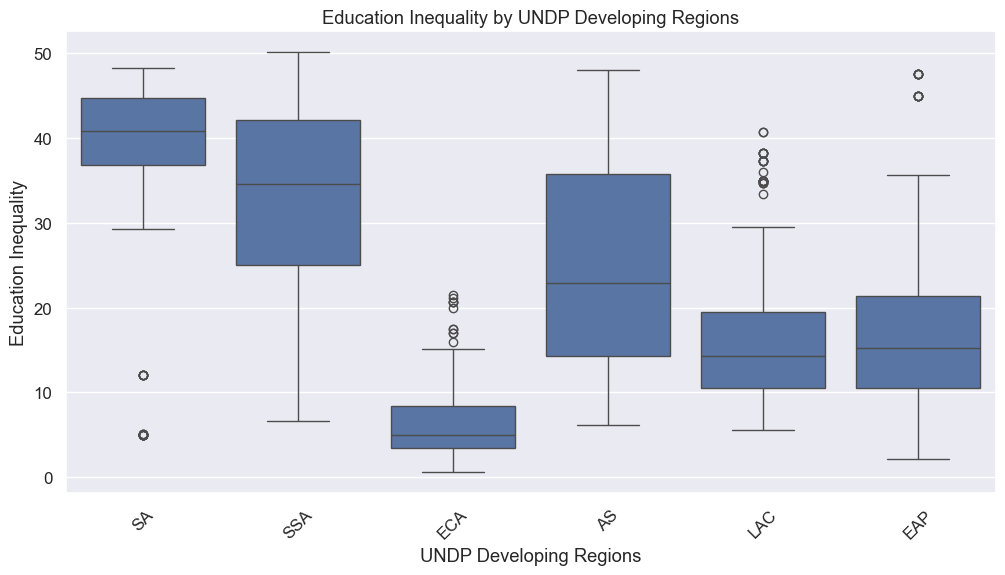

In [28]:
#Education Inequality by UNDP Developing Regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='UNDP Developing Regions', y='Education Inequality')
plt.title('Education Inequality by UNDP Developing Regions')
plt.xticks(rotation=45)
plt.show()


Boxplots show that regions such as Sub-Saharan Africa and South Asia tend to have higher education inequality, while Europe and Central Asia(ECA) generally perform better.